<a href="https://colab.research.google.com/github/AbhinavGupta-de/SST_ML/blob/main/Sorting_Fish_Improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agenda

1. Random Dataset
    - contains two type of fish
    - N datapoints
    - each datapoint will be a 2d vector
    - length and breadth of the fish
2. Write some code for Math
    - norm, distance of vector from plane
3. Brute force to find the best hyperplane(line)
4. plot this


In [2]:
import numpy as np
import pandas as pd
import random

In [3]:
random.seed(32)

## Create a random dataset

In [4]:
TUNA = -1
SALMON = +1
N = 100

In [5]:
def make_random_tuna():
  return random.random() * 3, random.random() * 4

def make_random_salmon():
  return random.random() * 4 + 1, random.random() * 3 + 2


In [6]:
tunas = [make_random_tuna() for _ in range(N//2) ]
salmons = [make_random_salmon() for _ in range(N//2)]


In [7]:

dataset = []
dataset += [(tuna, TUNA) for tuna in tunas]
dataset += [(salmon, SALMON) for salmon in salmons]


In [8]:
print(dataset[:-5])

[((0.23226535155991235, 0.8544671578599532), -1), ((0.9093850113083563, 3.6008547317324564), -1), ((1.488757476754224, 2.8809622835680924), -1), ((0.30070610325158464, 2.035708228657874), -1), ((2.529218786740209, 2.091197243051746), -1), ((2.834102265372737, 3.5272005340090677), -1), ((1.1128820166262745, 0.002984390926646263), -1), ((2.2658015589759093, 0.5056368268925091), -1), ((0.028232518258753614, 2.9227366081772392), -1), ((2.5285258636541297, 3.3463101174780734), -1), ((2.8603077365105127, 0.8066809906440158), -1), ((0.24450229110249944, 0.4830002497183816), -1), ((2.9332370353966457, 0.44770159505832385), -1), ((0.47862728921004694, 0.08039836381043441), -1), ((0.147996759157069, 0.15306635366537513), -1), ((1.0590971460965284, 0.6530732949973683), -1), ((0.9290240793324273, 3.7152408210156205), -1), ((0.5024466261560098, 3.257425213233887), -1), ((2.215072280897685, 2.274088191269907), -1), ((1.7270848471459688, 3.0805775533062825), -1), ((1.7612816532748747, 0.9171818878772

In [9]:
from matplotlib import pyplot as plt

tuna_x, tuna_y = zip(*tunas)
salmon_x, salmon_y = zip(*salmons)

def plot_model(plane=None):
  plt.scatter(tuna_x, tuna_y, color='blue', label='Tuna')
  plt.scatter(salmon_x, salmon_y, color='red', label='Salmon')
  plt.title("Fish classification")
  plt.xlabel("Length")
  plt.ylabel("Width")

  if plane is not None:
    w,w0 = plane
    w1, w2 = w
    x_values = np.linspace(min(min(tuna_x), min(salmon_x)), max(max(tuna_x), max(salmon_x)), 100)
    y_values = [(-w1/w2) * x - w0/w2 for x in x_values]
    plt.plot(x_values, y_values, color='green', label="Separating Hyperplane (line)")

  plt.legend()
  plt.show

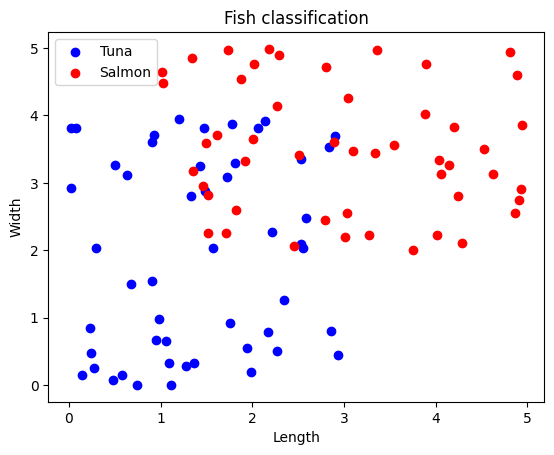

In [10]:
plot_model()

In [11]:
def norm(w):
  return sum(wi ** 2 for wi in w) ** 0.5

def dot(x, w):
  return sum(xi * wi for xi, wi in zip(x, w))

def distance_from_plane(x, plane):
  w, w0 = plane
  return (dot(x, w)+ w0) / norm(w)

def loss(data, plane):
  return sum(distance_from_plane(xi, plane) * yi for xi, yi in data)

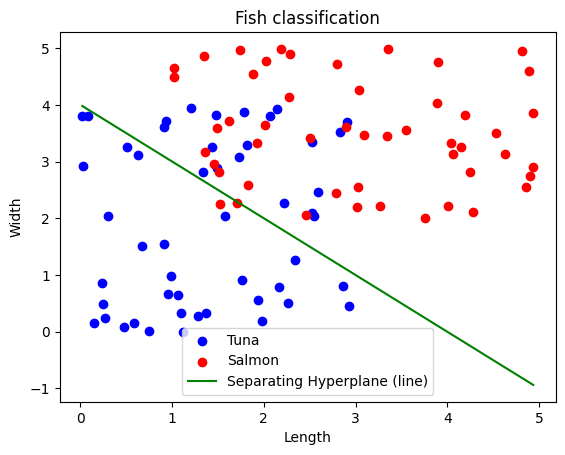

In [12]:
random_plane = [1, 1], -4
plot_model(random_plane)

New beset plane = ([-6.0, -6.0], -5.0) with a loss of <function loss at 0x7fe6b359caf0>
New beset plane = ([-6.0, -6.0], -4.16) with a loss of <function loss at 0x7fe6b359caf0>
New beset plane = ([-6.0, -6.0], -2.4800000000000004) with a loss of <function loss at 0x7fe6b359caf0>
New beset plane = ([-5.7, -5.67], -5.0) with a loss of <function loss at 0x7fe6b359caf0>
New beset plane = ([-5.7, -5.67], -3.95) with a loss of <function loss at 0x7fe6b359caf0>
New beset plane = ([-5.7, -5.67], -3.1100000000000003) with a loss of <function loss at 0x7fe6b359caf0>
New beset plane = ([-5.7, -5.67], -2.9000000000000004) with a loss of <function loss at 0x7fe6b359caf0>
New beset plane = ([-5.7, -5.67], -2.6900000000000004) with a loss of <function loss at 0x7fe6b359caf0>
New beset plane = ([-5.4, -5.34], -5.0) with a loss of <function loss at 0x7fe6b359caf0>
New beset plane = ([-5.4, -5.34], -4.79) with a loss of <function loss at 0x7fe6b359caf0>
New beset plane = ([-5.4, -5.34], -4.16) with a lo

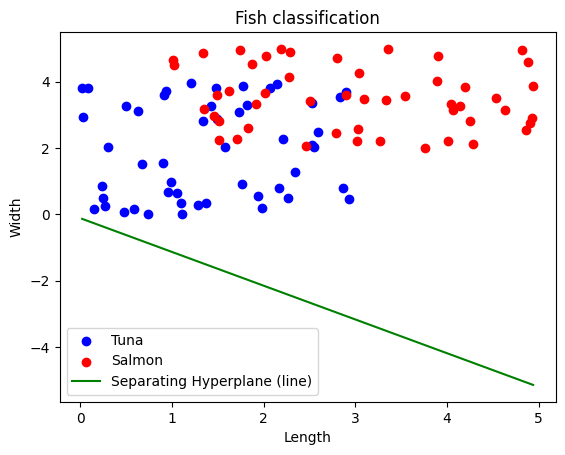

In [16]:
min_loss = float('inf')
best_plance=None
for w1 in np.arange(-6, 6, 0.3):
  for w2 in np.arange(-6, 6, 0.33):
    for w0 in np.arange(-5, 5, 0.21):
      plane = [w1, w2], w0
      l = loss(dataset, plane)
      if l < min_loss:
        min_loss = l
        best_plane = plane
        print(f'New best plane = {plane} with a loss of {l}')
plot_model(best_plane)

New best plane = ([-1.0, -1.0], -1.0) with a loss of -112.79197243892028
New best plane = ([-1.0, -1.0], -0.78) with a loss of -112.79197243892035
New best plane = ([-0.78, -0.77], -1.0) with a loss of -112.79519049190301
New best plane = ([-0.78, -0.77], 0.31999999999999984) with a loss of -112.79519049190303
New best plane = ([-0.78, -0.77], 1.1999999999999997) with a loss of -112.79519049190306
New best plane = ([-0.78, -0.77], 3.84) with a loss of -112.7951904919031


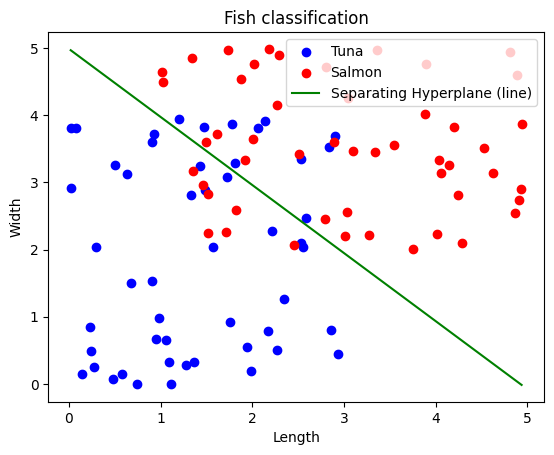

In [18]:
min_loss = float('inf')
best_plance=None
for w1 in np.arange(-1, 6, 0.11):
  for w2 in np.arange(-1, 6, 0.23):
    for w0 in np.arange(-1, 5, 0.11):
      plane = [w1, w2], w0
      l = loss(dataset, plane)
      if l < min_loss:
        min_loss = l
        best_plane = plane
        print(f'New best plane = {plane} with a loss of {l}')
plot_model(best_plane)

New best plane = ([-4.0, -4.0], 1.0) with a loss of -112.79197243892028
New best plane = ([-4.0, -4.0], 1.11) with a loss of -112.79197243892033
New best plane = ([-4.0, -4.0], 4.850000000000003) with a loss of -112.79197243892034
New best plane = ([-4.0, -3.89], 1.0) with a loss of -112.7930379308024
New best plane = ([-4.0, -3.89], 1.2200000000000002) with a loss of -112.79303793080244
New best plane = ([-3.94, -3.89], 1.0) with a loss of -112.7951813513032
New best plane = ([-3.94, -3.89], 1.11) with a loss of -112.79518135130323
New best plane = ([-3.3999999999999995, -3.3400000000000007], 1.0) with a loss of -112.79518256458951
New best plane = ([-3.3999999999999995, -3.3400000000000007], 1.11) with a loss of -112.79518256458957
New best plane = ([-3.2799999999999994, -3.230000000000001], 1.0) with a loss of -112.79527116936274
New best plane = ([-3.2799999999999994, -3.230000000000001], 1.11) with a loss of -112.7952711693628


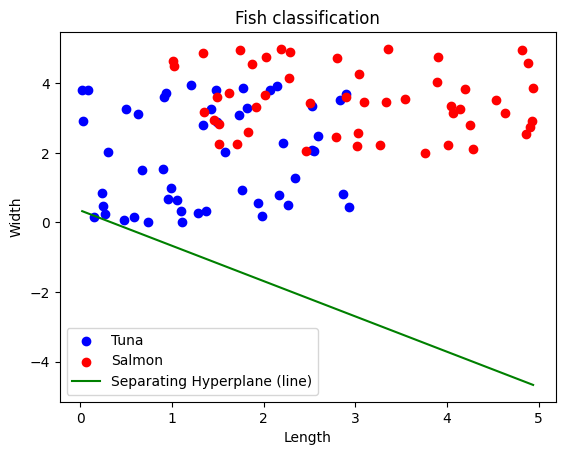

In [24]:
min_loss = float('inf')
best_plance=None
for w1 in np.arange(-4, 1, 0.06):
  for w2 in np.arange(-4, 1, 0.11):
    for w0 in np.arange(1, 5, 0.11):
      plane = [w1, w2], w0
      l = loss(dataset, plane)
      if l < min_loss:
        min_loss = l
        best_plane = plane
        print(f'New best plane = {plane} with a loss of {l}')
plot_model(best_plane)

New best plane = ([-8.0, -8.0], -8.0) with a loss of -112.79197243892028
New best plane = ([-8.0, -8.0], -7.669999999999999) with a loss of -112.79197243892034
New best plane = ([-8.0, -8.0], -7.339999999999998) with a loss of -112.7919724389204
New best plane = ([-8.0, -7.89], -8.0) with a loss of -112.79524154194696
New best plane = ([-8.0, -7.89], -7.89) with a loss of -112.79524154194702
New best plane = ([-8.0, -7.89], -7.229999999999998) with a loss of -112.79524154194704
New best plane = ([-8.0, -7.89], -6.019999999999994) with a loss of -112.79524154194705
New best plane = ([-8.0, -7.89], -1.839999999999982) with a loss of -112.79524154194706
New best plane = ([-7.4600000000000035, -7.339999999999998], -8.0) with a loss of -112.7952592982427
New best plane = ([-7.4600000000000035, -7.339999999999998], -7.779999999999999) with a loss of -112.79525929824271
New best plane = ([-7.4600000000000035, -7.339999999999998], -7.009999999999997) with a loss of -112.79525929824277
New best

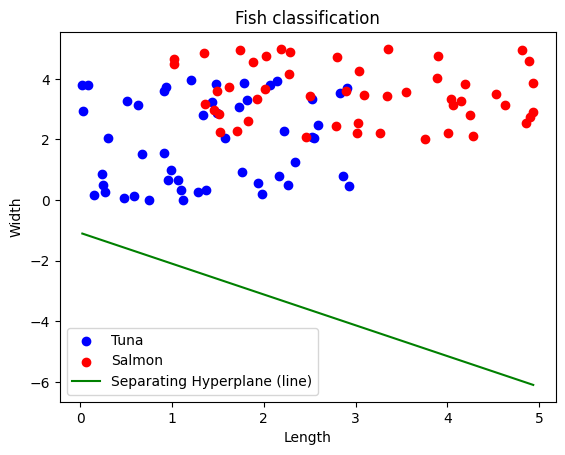

In [25]:
min_loss = float('inf')
best_plance=None
for w1 in np.arange(-8, 2, 0.06):
  for w2 in np.arange(-8, 1, 0.11):
    for w0 in np.arange(-8, 8, 0.11):
      plane = [w1, w2], w0
      l = loss(dataset, plane)
      if l < min_loss:
        min_loss = l
        best_plane = plane
        print(f'New best plane = {plane} with a loss of {l}')
plot_model(best_plane)

New best plane = ([-2.0, -2.0], 2.0) with a loss of -112.79197243892025
New best plane = ([-2.0, -2.0], 2.18) with a loss of -112.79197243892028
New best plane = ([-2.0, -2.0], 2.3600000000000003) with a loss of -112.7919724389203
New best plane = ([-2.0, -2.0], 2.4200000000000004) with a loss of -112.79197243892031
New best plane = ([-1.7799999999999998, -1.77], 2.0) with a loss of -112.7939549331999
New best plane = ([-1.7799999999999998, -1.77], 2.06) with a loss of -112.79395493319993
New best plane = ([-1.7799999999999998, -1.77], 2.12) with a loss of -112.79395493319994
New best plane = ([-1.7799999999999998, -1.77], 4.820000000000002) with a loss of -112.79395493319997
New best plane = ([-1.5599999999999996, -1.54], 2.0) with a loss of -112.79519049190301
New best plane = ([-1.5599999999999996, -1.54], 2.12) with a loss of -112.79519049190303
New best plane = ([-1.5599999999999996, -1.54], 2.7800000000000007) with a loss of -112.79519049190304
New best plane = ([-1.5599999999999

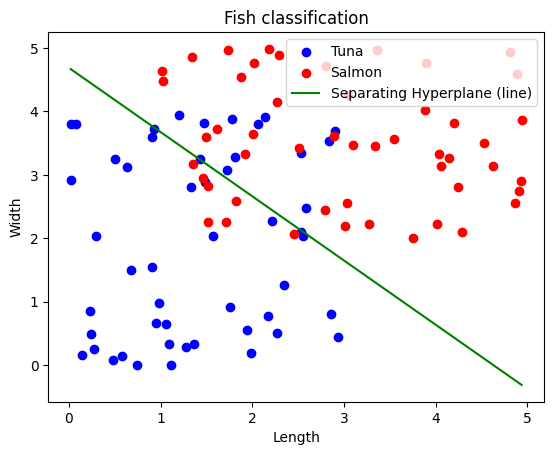

In [28]:
min_loss = float('inf')
best_plance=None
for w1 in np.arange(-2, 4, 0.11):
  for w2 in np.arange(-2, 4, 0.23):
    for w0 in np.arange(2, 9, 0.06):
      plane = [w1, w2], w0
      l = loss(dataset, plane)
      if l < min_loss:
        min_loss = l
        best_plane = plane
        print(f'New best plane = {plane} with a loss of {l}')
plot_model(best_plane)